In [2]:
#Importing the data and checking the list of variables and rows
import pandas as pd
import numpy as np


train=pd.read_csv("train_loan.csv", encoding="Latin-1")
test=pd.read_csv("test_loan.csv", encoding="Latin-1")
sample_submission=pd.read_csv("sample_submission_loan.csv", encoding="Latin-1")


print(train.shape)
print(test.shape)
print(sample_submission.shape)



(614, 13)
(367, 12)
(367, 2)


In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
#Installing PyCaret
!pip install pycaret

In [4]:
#Predicing the loan approval decision (Y/N) is a classification problem
#Importing classification from PyCaret to build several regression models

from pycaret import classification
from pycaret.classification import *

In [5]:
#Setting up the PyCaret with several parameters for building classification models
#normalization= True (is a technique often applied as part of data preparation for machine learning. The goal of normalization is to rescale the values of numeric columns in the dataset without distorting differences in the ranges of values or losing information.)
#transformation= True (Transformation is a more radical technique. Transformation changes the shape of the distribution such that the transformed data can be represented by a normal or approximate normal distribution)
#feature_interaction= True (It is often seen in machine learning experiments when two features combined through an arithmetic operation becomes more significant in explaining variances in the data, than the same two features separately)
#feature_selection= True (Feature Importance is a process used to select features in the dataset that contributes the most in predicting the target variable. Working with selected features instead of all the features reduces the risk of over-fitting, improves accuracy, and decreases the training time. In PyCaret, this can be achieved using feature_selection parameter)
#remove_multicollinearity=True (Multicollinearity (also called collinearity) is a phenomenon in which one feature variable in the dataset is highly linearly correlated with another feature variable in the same dataset. Multicollinearity increases the variance of the coefficients, thus making them unstable and noisy for linear models. One such way to deal with Multicollinearity is to drop one of the two features that are highly correlated with each other. This can be achieved in PyCaret using remove_multicollinearity parameter within setup)
#multicollinearity_threshold (Threshold used for dropping the correlated features. Only comes into effect when remove_multicollinearity is set to True)
#ignore_low_variance= True (Sometimes a dataset may have a categorical feature with multiple levels, where distribution of such levels are skewed and one level may dominate over other levels. This means there is not much variation in the information provided by such feature. Such features are eliminated when this is set as True)

classification_setup=classification.setup(data=train, target='Loan_Status', 
                                         normalize = True,
                                         transformation= True,
                                         feature_interaction= True,
                                         feature_selection= True,
                                         remove_multicollinearity=True,
                                         multicollinearity_threshold=0.6,
                                         ignore_low_variance= True,
                                         silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7884
1,Target Type,Binary
2,Label Encoded,"N: 0, Y: 1"
3,Original Data,"(614, 13)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
#This step compares all the Regression Models available with in PyCaret
#Best model against every Classification model comparison statistics is highlighted 
compare_models()

#Best model is Catboost Regressor when we compare models against Accuracy

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.790400,0.773900,0.925200,0.802400,0.858700,0.459100
1,Logistic Regression,0.785800,0.784600,0.908400,0.806000,0.853200,0.458900
2,Ada Boost Classifier,0.785800,0.762900,0.901700,0.809400,0.852200,0.464200
3,Ridge Classifier,0.783400,0.000000,0.901500,0.807400,0.850900,0.456100
4,Linear Discriminant Analysis,0.783400,0.786800,0.901500,0.807400,0.850900,0.456100
5,Gradient Boosting Classifier,0.781100,0.774800,0.912000,0.800300,0.851400,0.441000
6,Extreme Gradient Boosting,0.776400,0.792800,0.908600,0.796300,0.848000,0.429900
7,K Neighbors Classifier,0.776200,0.738400,0.915400,0.794000,0.849200,0.422800
8,Extra Trees Classifier,0.767000,0.755300,0.894600,0.793000,0.839500,0.414200
9,Random Forest Classifier,0.762300,0.772900,0.844000,0.816800,0.829800,0.435600


In [7]:
#Creating the catboost model as it was the best among all the models when compared against Accuracy
catboost  = create_model('catboost') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8605,0.9000,0.9333,0.8750,0.9032,0.6542
1,0.7674,0.7641,0.9000,0.7941,0.8438,0.3961
2,0.8605,0.7308,0.9667,0.8529,0.9062,0.6376
3,0.7907,0.8205,0.9333,0.8000,0.8615,0.4432
4,0.7674,0.8179,0.9667,0.7632,0.8529,0.3323
5,0.7674,0.7217,0.9310,0.7714,0.8438,0.4044
6,0.7442,0.7241,0.8966,0.7647,0.8254,0.3582
7,0.7442,0.7611,0.9310,0.7500,0.8308,0.3310
8,0.7442,0.6823,0.8621,0.7812,0.8197,0.3833
9,0.8571,0.8170,0.9310,0.8710,0.9000,0.6510


In [8]:
#Hyperparamter Optimization
#Tuning the hyper paramters of the catboost model built above
tuned_cb = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8372,0.8974,0.9667,0.8286,0.8923,0.5669
1,0.7907,0.7667,0.9667,0.7838,0.8657,0.4145
2,0.8372,0.8256,0.9667,0.8286,0.8923,0.5669
3,0.8140,0.8513,1.0000,0.7895,0.8824,0.4658
4,0.7907,0.8077,1.0000,0.7692,0.8696,0.3828
5,0.7907,0.7069,1.0000,0.7632,0.8657,0.4284
6,0.7907,0.6576,0.9655,0.7778,0.8615,0.4526
7,0.7907,0.7217,1.0000,0.7632,0.8657,0.4284
8,0.8140,0.6626,0.9655,0.8000,0.8750,0.5235
9,0.8810,0.9231,1.0000,0.8529,0.9206,0.6884


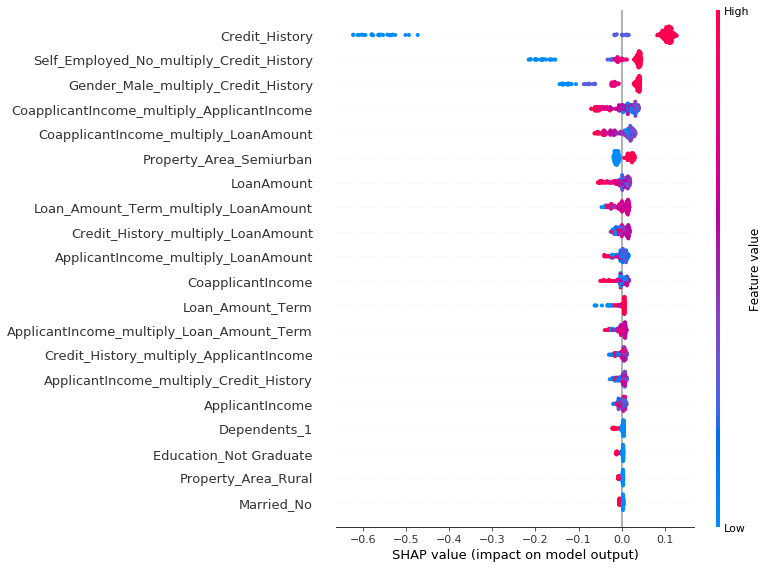

In [9]:
#Inpreting the significant featurs of the model
#Looking at the features, it looks like most significant features are the ones that are formed using feature interaction (where multiple features are combined to form a single feature)

interpret_model(tuned_cb)

In [13]:
#Predicting the model on unseen data for submission to Analytics Vidhya Competition
#This model has a an Accuracy score of 77% when submitted in Analytics Vidhya Competition
#Below loan approval predictions are in the form of probablities.
#Probability close to 1 is decision for Yes and close to 0 is decision for No

predictions = predict_model(tuned_cb, data = test)
sample_submission['Loan_Status'] = predictions['Score']
sample_submission.to_csv('loan_approval_pycaret.csv',index=False)
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,0.6809
1,LP001022,0.6887
2,LP001031,0.6374
3,LP001035,0.6034
4,LP001051,0.6362


In [15]:
#Predicting the model on unseen data for submission to Analytics Vidhya Competition
#This model has a an Accuracy score of 77% when submitted in Analytics Vidhya Competition

#Analytics Vidhya competition requires submission in the form of Labels (Y/N)
#prediction['Label'] is used to label the prediction in the form of 0/1 and later cleaned up to contain N/Y

predictions = predict_model(tuned_cb, data = test)
sample_submission['Loan_Status'] = predictions['Label']


cleanup_cols={"Loan_Status": {1:"Y", 0:"N"}}
              
sample_submission.replace(cleanup_cols, inplace=True)

sample_submission.to_csv('loan_approval_pycaret.csv',index=False)
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [16]:
#Finalizing the model
#The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production

final_catboost = finalize_model(tuned_cb)

#Final Tuned Catboost Regression parameters for deployment
print(final_catboost)

In [17]:
#save_model() allows you to save the model along with entire transformation pipeline for later use.
save_model(final_catboost,'Final CatBoost Classifier Model 28Jul2020')

Transformation Pipeline and Model Succesfully Saved


In [19]:
#Loading the saved model
saved_final_catboost = load_model('Final CatBoost Classifier Model 28Jul2020')

Transformation Pipeline and Model Sucessfully Loaded
